# Fik-8 let 18. 12. 2022 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob
import matplotlib


## Read Logfile - AIRDOS C plastak

In [2]:
fto = '/storage/experiments/2022/1218_FIK8/Fik8a_plastic_scin/DATALOG.TXT'


l=[]
l.extend(range(0,1034))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS',3]
fw = df.loc[df[0]=='$AIRDOS',2]
last = df.loc[df[0]=='$AIRDOS'].index
print ('s.n.: ',sn[0])
print ('f.v.: ',fw[0])
print(df.loc[df[0]=='$AIRDOS',1])
print(len(df))
print(last[-1:][0])

# keep only last run
#df.drop(df.index[:last[-1:][0]], inplace=True) 

s.n.:  1290c00806a200918013a000a00000b6
f.v.:  BC412-10x40x50
0        Fik8a_1024_v0
112      Fik8a_1024_v0
133      Fik8a_1024_v0
555      Fik8a_1024_v0
580      Fik8a_1024_v0
             ...      
8476     Fik8a_1024_v0
8477     Fik8a_1024_v0
8498     Fik8a_1024_v0
19199    Fik8a_1024_v0
19220    Fik8a_1024_v0
Name: 1, Length: 178, dtype: object
9522
19220


In [25]:
#df = df.iloc[1:]
df.iloc[-10:,8:]
df

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,$AIRDOS,Fik8a_1024_v0,BC412-10x40x50,1290c00806a200918013a000a00000b6,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GPRMC,1543,154402.00,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GPGGA,154402.00,NaN,NaN,NaN,NaN,0,00,99.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,$GPRMC,154403.00,V,NaN,NaN,NaN,NaN,NaN,NaN,131222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,$GPGGA,154403.00,NaN,NaN,NaN,NaN,0,00,99.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19209,$GPRMC,205854.00,A,4947.67061,N,01455.41340,E,56.071,330.25,181222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19211,$GPGGA,205854.00,4947.67061,N,01455.41340,E,1,09,1.05,384.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19217,$GPRMC,205855.00,A,4947.68363,N,01455.40126,E,53.563,327.13,181222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19219,$TIME,11.50,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fill position and time

In [3]:
df.drop(df.loc[(df[0]=='$GPRMC') & (df[2]=='V')].index, inplace=True)
df.drop(df.loc[(df[0]=='$GPRMC') & (df[3]=='V')].index, inplace=True)
df['latf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',3])
df['lonf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',5])
df['on_miliseconds'] = pd.to_numeric(df.loc[df[0]=='$TIME',1]) * 1000
df['miliseconds'] = pd.to_numeric(df.loc[df[0]=='$HIST',2]) * 1000
df['gps_time'] = df.loc[df[0]=='$GPRMC',1]
df['gps_date'] = df.loc[df[0]=='$GPRMC',9]
df['alt'] = df.loc[df[0]=='$GPGGA',9]
df.loc[(df[0]=='$GPRMC') & (df[6]=='E'),'lon_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[6]=='W'),'lon_hem']=-1
df.loc[(df[0]=='$GPRMC') & (df[4]=='N'),'lat_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[4]=='S'),'lat_hem']=-1
df['lat'] = (np.trunc(df['latf']/100) + (((df['latf']/100) - np.trunc(df['latf']/100)) * 100) / 60.0) * df['lat_hem']
df['lon'] = (np.trunc(df['lonf']/100) + ((df['lonf']/100) - np.trunc(df['lonf']/100)) * 100 / 60.0) * df['lon_hem']  
df['date'] = pd.to_datetime(df['gps_date']+df['gps_time'], format='%d%m%y%H%M%S.%f')#,errors='coerce')
df.drop('lon_hem', axis=1, inplace=True)
df.drop('lat_hem', axis=1, inplace=True)
df.drop('latf', axis=1, inplace=True)
df.drop('lonf', axis=1, inplace=True)
df.drop('gps_time', axis=1, inplace=True)
df.drop('gps_date', axis=1, inplace=True)
df['meas'] = df.loc[df[0]=='$HIST',1]
df = df.fillna(method='ffill')
df.drop(df[df[0]=='$GPGGA'].index, inplace=True)
df.drop(df[df[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)
df.drop(df[df[0]=='$TIME'].index, inplace=True)
df['UTC'] = df['date'] + pd.to_timedelta(df['miliseconds'], unit='ms') - pd.to_timedelta(df['on_miliseconds'], unit='ms')
df.drop('date', axis=1, inplace=True)
df.drop('miliseconds', axis=1, inplace=True)
df.drop('on_miliseconds', axis=1, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1029,1030,1031,1032,1033,alt,lat,lon,meas,UTC
22,$HIST,0,26.63,986.89,22.69,4.09,-110,974,974,0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,NaT
23,$HIST,1,39.87,986.91,22.63,4.09,-104,974,974,0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,NaT
24,$HIST,2,53.13,986.89,22.63,4.09,-101,974,974,0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2,NaT
25,$HIST,3,66.37,986.89,22.63,4.09,-99,974,974,0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3,NaT
26,$HIST,4,79.62,986.90,22.63,4.09,-96,974,974,0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19174,$HIST,3045,45307.28,994.26,14.50,3.69,-98,123,977,0,...,0.0,0.0,0.0,NaN,NaN,484.7,49.751501,14.979218,3045,2022-12-18 20:57:24.750
19175,$HIST,3046,45320.53,995.52,14.50,3.69,-99,122,977,0,...,0.0,0.0,0.0,NaN,NaN,484.7,49.751501,14.979218,3046,2022-12-18 20:57:38.000
19176,$HIST,3047,45333.80,996.58,14.56,3.69,-99,122,977,0,...,0.0,0.0,0.0,NaN,NaN,484.7,49.751501,14.979218,3047,2022-12-18 20:57:51.270
19197,$HIST,3048,45357.32,995.76,14.56,3.69,-108,121,977,0,...,0.0,0.0,0.0,NaN,NaN,324.9,49.782045,14.931779,3048,2022-12-18 20:58:14.800


## Add individual events to histogram

In [4]:
df['alt'] = df['alt'].apply(pd.to_numeric,errors='coerce')
df['lat'] = df['lat'].apply(pd.to_numeric,errors='coerce')
df['lon'] = df['lon'].apply(pd.to_numeric,errors='coerce')
df['meas'] = df['meas'].apply(pd.to_numeric,errors='coerce')
histogram = df.iloc[:,12:]
histogram['temperature'] = df[4].apply(pd.to_numeric,errors='coerce')
histogram['pressure'] = df[3].apply(pd.to_numeric,errors='coerce')
histogram['voltage'] = df[5].apply(pd.to_numeric,errors='coerce')
histogram['current'] = df[6].apply(pd.to_numeric,errors='coerce')
#histogram['UTC'] = pd.to_datetime(df['UTC'])

histogram = histogram.loc[histogram['alt']>0]

histogram.set_index('UTC', drop=False, inplace=True)
#histogram = histogram[pd.to_datetime('2022-12-18'):]
histogram = histogram.loc['2022-12-18':]
#histogram

/tmp/ipykernel_23374/2602800975.py:16: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  histogram = histogram.loc['2022-12-18':]


In [5]:
histogram


,12,13,14,15,16,17,18,19,20,21,...,1033,alt,lat,lon,meas,UTC,temperature,pressure,voltage,current
UTC,,,,,,,,,,,,,,,,,,,,,
2022-12-18 08:41:00.060,0,0,0,0,0,0,0,0,0,0,...,NaN,355.6,49.678273,13.288051,72,2022-12-18 08:41:00.060,-4.88,990.91,4.03,-93.0
2022-12-18 08:41:12.990,1,1,0,0,0,0,0,0,0,0,...,NaN,355.6,49.678273,13.288051,73,2022-12-18 08:41:12.990,-4.88,990.91,4.03,-89.0
2022-12-18 08:41:25.940,0,0,0,0,1,0,0,0,1,0,...,NaN,355.6,49.678273,13.288051,74,2022-12-18 08:41:25.940,-4.88,990.90,4.03,-87.0
2022-12-18 08:41:39.170,0,1,0,0,0,0,0,0,0,0,...,NaN,355.6,49.678273,13.288051,75,2022-12-18 08:41:39.170,-4.88,990.90,4.03,-86.0
2022-12-18 08:41:52.420,0,0,0,0,0,0,1,0,0,1,...,NaN,355.6,49.678273,13.288051,76,2022-12-18 08:41:52.420,-4.81,990.91,4.03,-86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-18 20:57:24.750,0,0,0,0,0,1,0,0,0,0,...,NaN,484.7,49.751501,14.979218,3045,2022-12-18 20:57:24.750,14.50,994.26,3.69,-98.0
2022-12-18 20:57:38.000,0,0,0,1,0,1,0,1,1,1,...,NaN,484.7,49.751501,14.979218,3046,2022-12-18 20:57:38.000,14.50,995.52,3.69,-99.0
2022-12-18 20:57:51.270,0,0,0,0,0,1,1,0,1,0,...,NaN,484.7,49.751501,14.979218,3047,2022-12-18 20:57:51.270,14.56,996.58,3.69,-99.0


In [35]:
#histogram.to_csv(dto + '/histogram.csv')

## Plot Flux

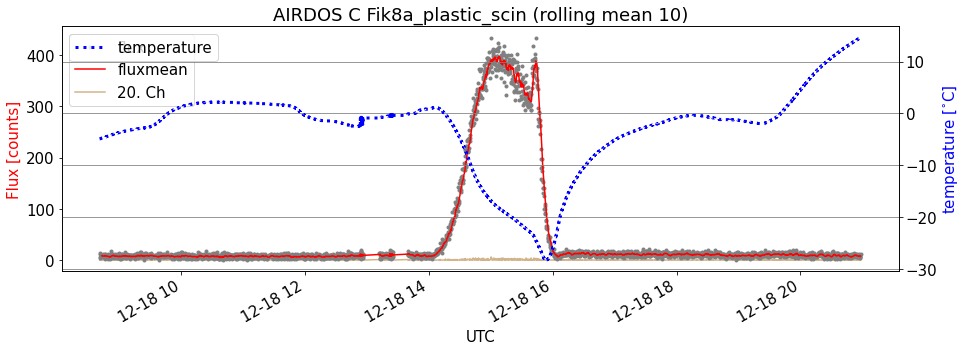

In [6]:
NOISE_LEVEL = 20
LAST_CHANNEL = 1000
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']
#xx = xx.loc['2022-4-25 00:00:00':'2022-4-25 8:00:00']
#xx = xx.loc['2022-1-16 00:00:00':'2022-1-21 00:00:00']
#xx = xx.loc['2021-11-17 00:00:00':'2021-11-18 00:00:00']
#xx = xx.loc['2022-07-17 00:00:00':'2022-07-17 19:50:00']
#xx = xx.loc['2022-07-17 20:00:00':'2022-07-17 23:50:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("AIRDOS C "+ s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-post')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='grey', linestyle='-')
plt.legend()



/tmp/ipykernel_23374/2630402959.py:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xx = xx.loc['2022-12-18 13:00:00':'2022-12-18 17:00:00']


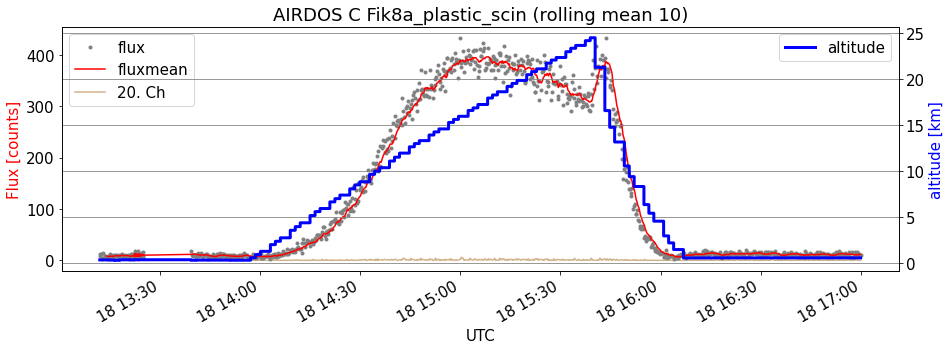

In [7]:
NOISE_LEVEL = 20
LAST_CHANNEL = 1000
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
xx = xx.loc['2022-12-18 13:00:00':'2022-12-18 17:00:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("AIRDOS C "+ s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
(xx['alt']/1000).plot(c='blue', label='altitude', linewidth='3', linestyle='-', drawstyle='steps-post')
plt.ylabel(r'altitude [km]', color='blue')

plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='grey', linestyle='-')
plt.legend()



/tmp/ipykernel_31951/3776564801.py:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xx = xx.loc['2022-12-18 13:00:00':'2022-12-18 17:00:00']


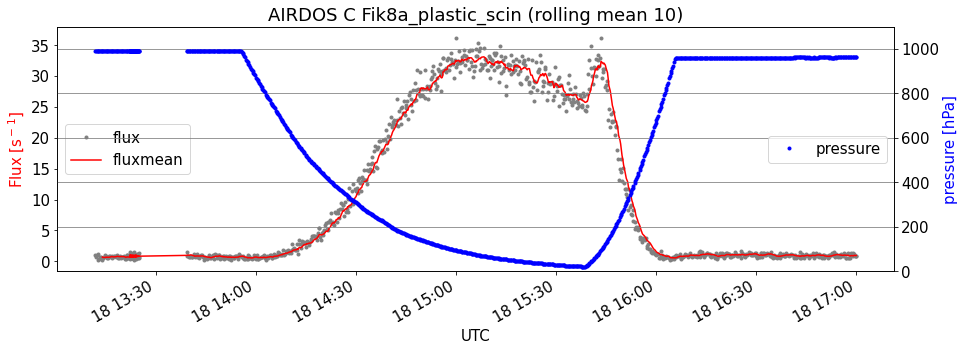

In [139]:
NOISE_LEVEL = 20
LAST_CHANNEL = 1000
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
xx = xx.loc['2022-12-18 13:00:00':'2022-12-18 17:00:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))/12

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
#(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("AIRDOS C "+ s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [s$^-$$^1$]', color='red')
plt.legend(loc=6)

ax = plt.twinx()

#plt.ylim([0,14000])
(xx['pressure']).plot(c='blue', label='pressure', linewidth='3', linestyle='', marker = '.', drawstyle='steps-post')
plt.ylabel(r'pressure [hPa]', color='blue')
plt.ylim(0,1100)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='grey', linestyle='-')
plt.legend(loc=5)



/tmp/ipykernel_23374/2189862161.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_23374/2189862161.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


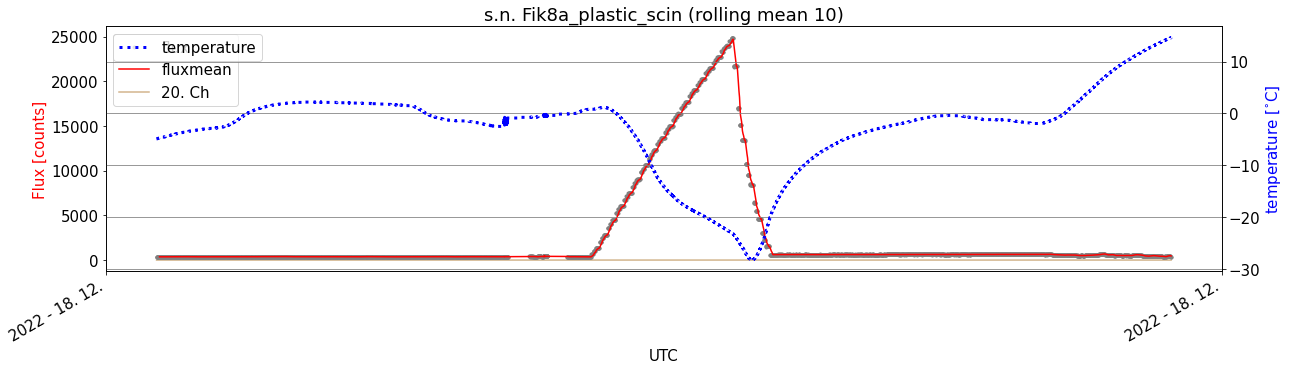

In [9]:
import matplotlib.dates as mdates

NOISE_LEVEL = 20
LAST_CHANNEL = 1023
WINDOW = 10

plt.figure(figsize=(20,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']
#xx = xx.loc['2022-5-19 00:00:00':'2022-5-21 00:00:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y - %d. %m.'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()

plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()

#plt.savefig(dto + '/flux.png')


/tmp/ipykernel_31951/51928318.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_31951/51928318.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


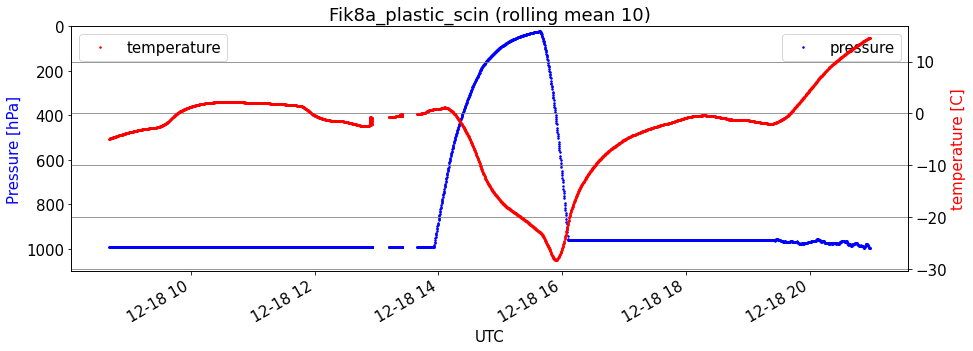

In [102]:
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']



xx['pressure'].plot(c='blue', linestyle='', marker='.', ms=3, label = 'pressure')

s = fto.split('/')
plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylim([1100,0])
plt.xlabel('UTC')
plt.ylabel(r'Pressure [hPa]', color='blue')
plt.legend()

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='red', label='temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel('temperature [C]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



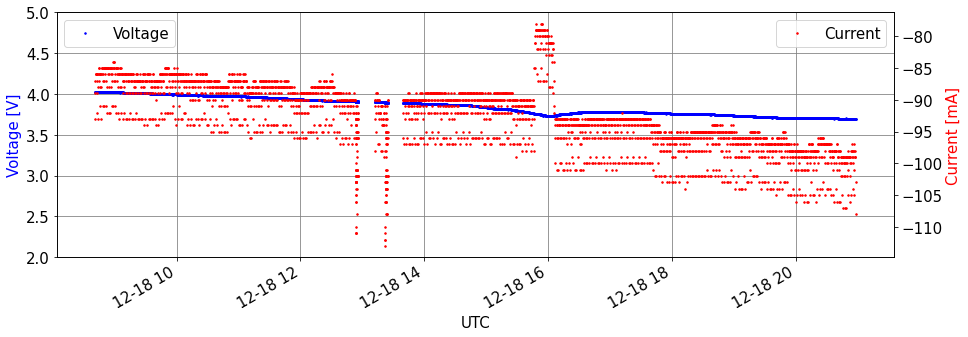

In [99]:
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2022-10-05 00:00:00':]
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
#xx = xx.loc['2021-08-15 00:00:00':'2021-08-16 00:00:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']



xx['voltage'].plot(c='blue', linestyle='', marker='.', ms=3, label = 'Voltage')

s = fto.split('/')
#plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylim([2,5])
plt.xlabel('UTC')
plt.ylabel(r'Voltage [V]', color='blue')
plt.legend(loc=2)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='grey', linestyle='-')

ax = plt.twinx()

#plt.ylim([0,14000])
xx['current'].plot(c='red', label='Current', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel('Current [mA]', color='red')

plt.legend()



/tmp/ipykernel_23374/2638491817.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))
/tmp/ipykernel_23374/2638491817.py:38: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_23374/2638491817.py:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


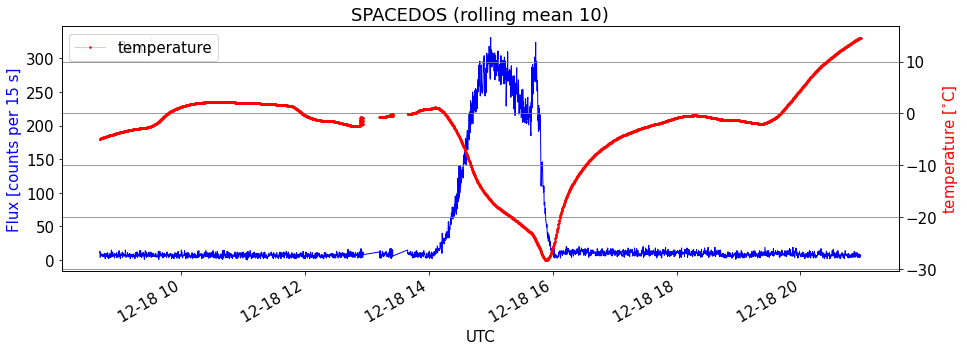

In [39]:
NOISE_LEVEL = 0
LAST_CHANNEL = 240
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']

xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

#xx['flux'].plot(c='gray', marker='.', linewidth=1)
xx['flux'].plot(c='blue', linewidth=1)
#xx['fluxmean'].plot(c='red')
#(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts per 15 s]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='red', label='temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



# Data SPACEDOS 02

In [10]:
#fto = glob.iglob("./data/*.TXT") # generator, search immediate subdirectories 

#fto = './data/AIRDOS/RUN00/F1.TXT' #  File to Open
#fto = './data/AIRDOS/RUN01_03/F1.TXT' #  File to Open
#fto = './data/AIRDOS/RUN04_23/F1.TXT' #  File to Open
fto = './data/DATALOG.TXT' #  File to Open
fto = '/storage/experiments/2021/05_AIRDOSC_kalibrace/NaITl/DATALOG.txt' #  File to Open
fto = '/storage/experiments/2019/05_PuAm/DD/DATALOG.TXT' #  File to Open
fto = '/storage/experiments/2021/12_test_geodos1024/DATALOG.TXT' #  File to Open
fto = '/storage/experiments/2022/1218_FIK8/SPACEDOS/DATALOG.TXT'
fto = '/storage/experiments/2022/1218_FIK8/SPACEDOS/FSCK0027.REC'

print (fto)

l=[]
#l.extend(range(0,261))
#l.extend(range(0,501))
l.extend(range(0,258))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
#df = pd.read_csv(fto, sep=',', header=None, comment='*')#,engine='python' )
df = df.reset_index(drop=True)

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

#df.drop(df[df[0]=='$STROKE'].index, inplace=True)
#df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
#df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
#df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
#df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
#df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

/storage/experiments/2022/1218_FIK8/SPACEDOS/FSCK0027.REC


' DEBUG\ndf = df.reset_index(drop=True)\ndf.drop(df[df.index > 100].index, inplace=True)\n'

Text(0, 0.5, 'Flux [counts per 10 s]')

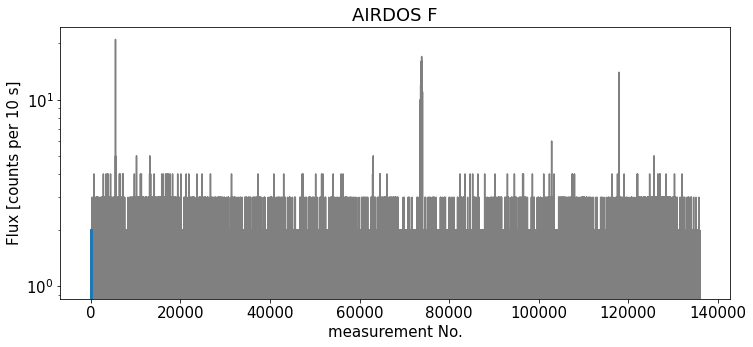

In [53]:
#%matplotlib notebook

rc = df.loc[df[0]=='$CANDY']
#rc = df.loc[df[0]=='$HIST']
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#rc = rc.loc[rc[257]<=255]
#rc=df
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

rc['sum'] = rc.iloc[:,14:255].sum(axis=1)

plt.figure(figsize=(12,5))
matplotlib.rcParams.update({'font.size': 15})

#rc['sum'].plot()
rc.loc[0:,'sum'].plot(c='gray')
plt.yscale('log')

#plt.ylim([0,50])

'''
#musala kalibrce
e1 = [10,41]
e2 = [43,55]
e3 = [66,90]
e4 = [91,113]
e5 = [116,123]
e6 = [125,134]
e7 = [143,170]
bn=189
e8 = [bn+2,bn+18]
e9 = [bn+24,bn+54]
e10 = [bn+59,bn+74]
e11 = [bn+120,bn+141]
e12 = [540,630]
e13 = [700,850]
#'''

'''
#musala kalibrce
e1 = [20,80]
e2 = [100,190]
e3 = [220,320]
e4 = [330,400]
e5 = [450,600]
e6 = [650,900]
e7 = [980,1100]
e8 = [1400,1550]
e9 = [1600,1750]
#'''

e = 950
e1 = [2,200]
e2 = [0,0]
e3 = [0,0]
e4 = [0,0]
e5 = [0,0]


rc.iloc[e1[0]:e1[1]]['sum'].plot()
rc.iloc[e2[0]:e2[1]]['sum'].plot()
rc.iloc[e3[0]:e3[1]]['sum'].plot()
rc.iloc[e4[0]:e4[1]]['sum'].plot()
rc.iloc[e5[0]:e5[1]]['sum'].plot()
#rc.ix[e6[0]:e6[1],'sum'].plot()
#rc.ix[e7[0]:e7[1],'sum'].plot()
#rc.ix[e8[0]:e8[1],'sum'].plot()
#rc.ix[e9[0]:e9[1],'sum'].plot()
#rc.ix[e10[0]:e10[1],'sum'].plot()
#rc.ix[e11[0]:e11[1],'sum'].plot()
#rc.ix[e12[0]:e12[1],'sum'].plot()
#rc.ix[e13[0]:e13[1],'sum'].plot()

plt.title('AIRDOS F')
#plt.title('AIRDOS A005')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')
#plt.xlim([73400,74200])
#plt.ylim([0,4000])



Text(0, 0.5, 'Flux [counts per 10 s]')

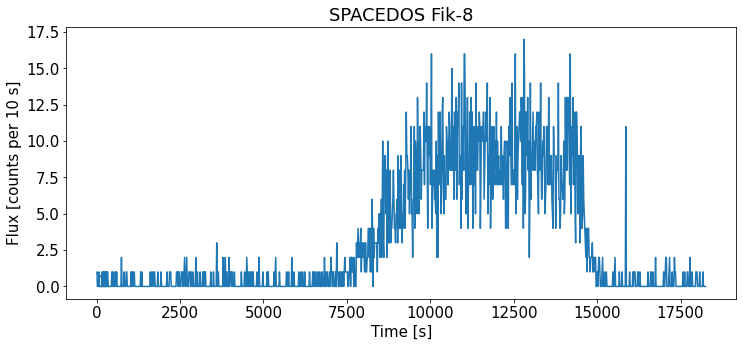

In [54]:
plt.figure(figsize=(12,5))
matplotlib.rcParams.update({'font.size': 15})
FROM = 73050
TO = 74200
rc = rc.iloc[FROM:TO]
plt.plot(rc[2], rc['sum'])
#plt.plot(rc.iloc[73400:74201,2], rc.loc[73400:74200,'sum'])
#plt.plot(rc.iloc[:,2], rc.loc[:,'sum'])
plt.title('SPACEDOS Fik-8')
#plt.title('AIRDOS A005')
plt.xlabel('Time [s]')
plt.ylabel('Flux [counts per 10 s]')


In [37]:
#rc['time'] = 

xx

,12,13,14,15,16,17,18,19,20,21,...,lat,lon,meas,UTC,temperature,pressure,voltage,current,flux,fluxmean
UTC,,,,,,,,,,,,,,,,,,,,,
2022-12-18 08:41:00.060,0,0,0,0,0,0,0,0,0,0,...,49.678273,13.288051,72,2022-12-18 08:41:00.060,-4.88,990.91,4.03,-93.0,366.6,NaN
2022-12-18 08:41:12.990,1,1,0,0,0,0,0,0,0,0,...,49.678273,13.288051,73,2022-12-18 08:41:12.990,-4.88,990.91,4.03,-89.0,368.6,NaN
2022-12-18 08:41:25.940,0,0,0,0,1,0,0,0,1,0,...,49.678273,13.288051,74,2022-12-18 08:41:25.940,-4.88,990.90,4.03,-87.0,359.6,NaN
2022-12-18 08:41:39.170,0,1,0,0,0,0,0,0,0,0,...,49.678273,13.288051,75,2022-12-18 08:41:39.170,-4.88,990.90,4.03,-86.0,361.6,NaN
2022-12-18 08:41:52.420,0,0,0,0,0,0,1,0,0,1,...,49.678273,13.288051,76,2022-12-18 08:41:52.420,-4.81,990.91,4.03,-86.0,365.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-18 20:57:24.750,0,0,0,0,0,1,0,0,0,0,...,49.751501,14.979218,3045,2022-12-18 20:57:24.750,14.50,994.26,3.69,-98.0,491.7,492.30
2022-12-18 20:57:38.000,0,0,0,1,0,1,0,1,1,1,...,49.751501,14.979218,3046,2022-12-18 20:57:38.000,14.50,995.52,3.69,-99.0,489.7,492.00
2022-12-18 20:57:51.270,0,0,0,0,0,1,1,0,1,0,...,49.751501,14.979218,3047,2022-12-18 20:57:51.270,14.56,996.58,3.69,-99.0,488.7,491.90


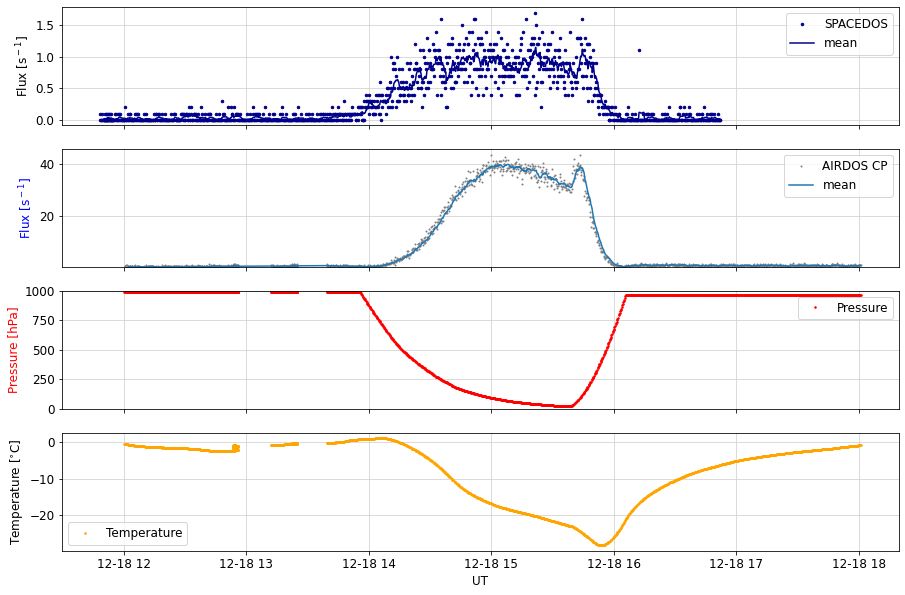

In [76]:
WINDOW = 10


fig, (ax6, ax3, ax5, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(15,10))
matplotlib.rcParams.update({'font.size': 12})

xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
xx.sort_index(inplace=True)
xx = xx.loc['2022-12-18 12:00':'2022-12-18 18:00']

rc[2] = pd.to_numeric(rc[2], errors='coerce')
rc['time'] = pd.to_datetime('2022-12-18 11:48') + pd.to_timedelta(rc[2], unit='s')
rc.set_index('time', inplace = True, drop=False)
rc.sort_index(inplace=True)
rc = rc.loc['2022-12-18 10:00':'2022-12-18 20:00']
rc['fluxmean'] = rc['sum'].rolling(WINDOW).mean()


xx['flux'] = (xx.iloc[:,20:1000].sum(axis=1))
xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

ax3.plot(xx['flux']/10, marker='.', color='gray', label='AIRDOS CP', ms=2, linestyle='none')
ax3.plot(xx['fluxmean']/10, label='mean')
ax3.grid(visible=True, which='major', color='lightgrey', linestyle='-')
ax3.set_ylabel(r'Flux [s$^-$$^1$]', color='blue')
#ax3.set_yscale('log')
ax3.set_ylim(0.5,)
ax3.legend()

ax4.plot(xx['temperature'], c='orange', label='Temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax4.set_xlabel('UT')
ax4.set_ylabel(r'Temperature [$^{\circ}$C]')
ax4.grid(visible=True, which='major', color='lightgrey', linestyle='-')
ax4.legend()

ax6.plot(rc['time'], rc['sum']/10, ls='', marker='.', ms=5, label='SPACEDOS', c='darkblue')
ax6.plot(rc['time'], rc['fluxmean']/10, ls='-', label='mean', c='darkblue')
ax6.set_ylabel('Flux [s$^-$$^1$]')
ax6.legend()
ax6.grid(visible=True, which='major', color='lightgrey', linestyle='-')
#ax6.set_ylim(0,60)

ax5.plot(xx['pressure'], c='red', label='Pressure', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax5.set_ylabel('Pressure [hPa]', color='red')
ax5.grid(visible=True, which='major', color='lightgrey', linestyle='-')
ax5.set_ylim(0,1000)
ax5.legend()


# Energy Spectrum

/tmp/ipykernel_23374/3820904587.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ener = yy.iloc[:,12:1000].sum()
/tmp/ipykernel_23374/3820904587.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,2e4])


(0.7172115603337182, 20000.0)

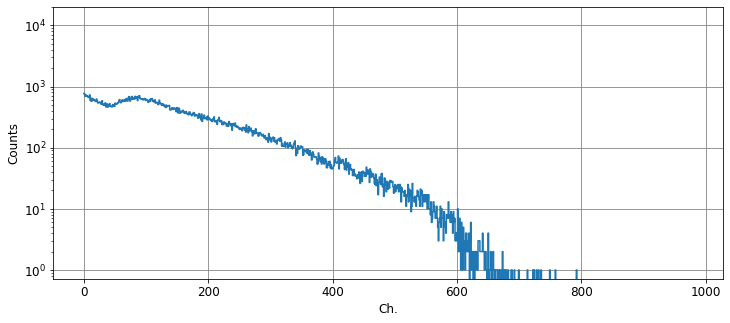

In [77]:
yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

yy.iloc[0:1000] = yy.iloc[0:1000].apply(pd.to_numeric,errors='coerce')

#yy = yy.loc['2022-10-06 00:00:00':]
#yy = yy.loc['2021-05-12 13:58:00':'2021-05-12 14:20:00']

#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,12:1000].sum()
ener = ener.reset_index()
plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
#plt.xlim([32,280])
plt.ylim([0,2e4])

In [98]:
histogram

,12,13,14,15,16,17,18,19,20,21,...,1033,alt,lat,lon,meas,UTC,temperature,pressure,voltage,current
UTC,,,,,,,,,,,,,,,,,,,,,
2022-12-18 08:41:00.060,0,0,0,0,0,0,0,0,0,0,...,NaN,355.6,49.678273,13.288051,72,2022-12-18 08:41:00.060,-4.88,990.91,4.03,-93.0
2022-12-18 08:41:12.990,1,1,0,0,0,0,0,0,0,0,...,NaN,355.6,49.678273,13.288051,73,2022-12-18 08:41:12.990,-4.88,990.91,4.03,-89.0
2022-12-18 08:41:25.940,0,0,0,0,1,0,0,0,1,0,...,NaN,355.6,49.678273,13.288051,74,2022-12-18 08:41:25.940,-4.88,990.90,4.03,-87.0
2022-12-18 08:41:39.170,0,1,0,0,0,0,0,0,0,0,...,NaN,355.6,49.678273,13.288051,75,2022-12-18 08:41:39.170,-4.88,990.90,4.03,-86.0
2022-12-18 08:41:52.420,0,0,0,0,0,0,1,0,0,1,...,NaN,355.6,49.678273,13.288051,76,2022-12-18 08:41:52.420,-4.81,990.91,4.03,-86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-18 20:57:24.750,0,0,0,0,0,1,0,0,0,0,...,NaN,484.7,49.751501,14.979218,3045,2022-12-18 20:57:24.750,14.50,994.26,3.69,-98.0
2022-12-18 20:57:38.000,0,0,0,1,0,1,0,1,1,1,...,NaN,484.7,49.751501,14.979218,3046,2022-12-18 20:57:38.000,14.50,995.52,3.69,-99.0
2022-12-18 20:57:51.270,0,0,0,0,0,1,1,0,1,0,...,NaN,484.7,49.751501,14.979218,3047,2022-12-18 20:57:51.270,14.56,996.58,3.69,-99.0


/tmp/ipykernel_23374/1852884939.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ener = yy.iloc[:,1:1000].sum()


(0.0, 20.0)

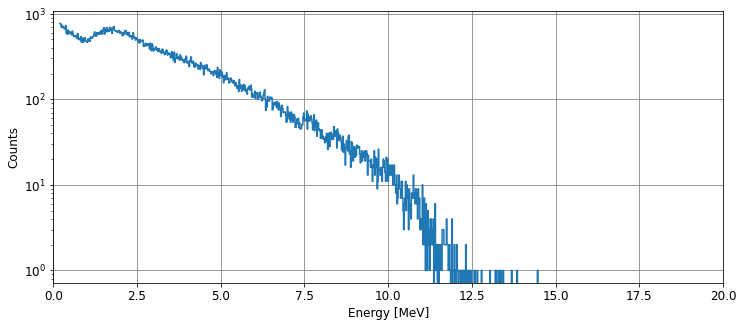

In [99]:
yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

yy.iloc[0:1000] = yy.iloc[0:1000].apply(pd.to_numeric,errors='coerce')

#yy = yy.loc['2022-10-06 00:00:00':]
#yy = yy.loc['2021-05-12 13:58:00':'2021-05-12 14:20:00']

#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,1:1000].sum()
ener = ener.reset_index()
ener['ener'] = 0.018 * ener.index + 0.2

plt.figure(figsize=(12,5))
plt.plot(ener['ener'], ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([0,20])
#plt.ylim([0,250])

TypeError: Image data of dtype object cannot be converted to float

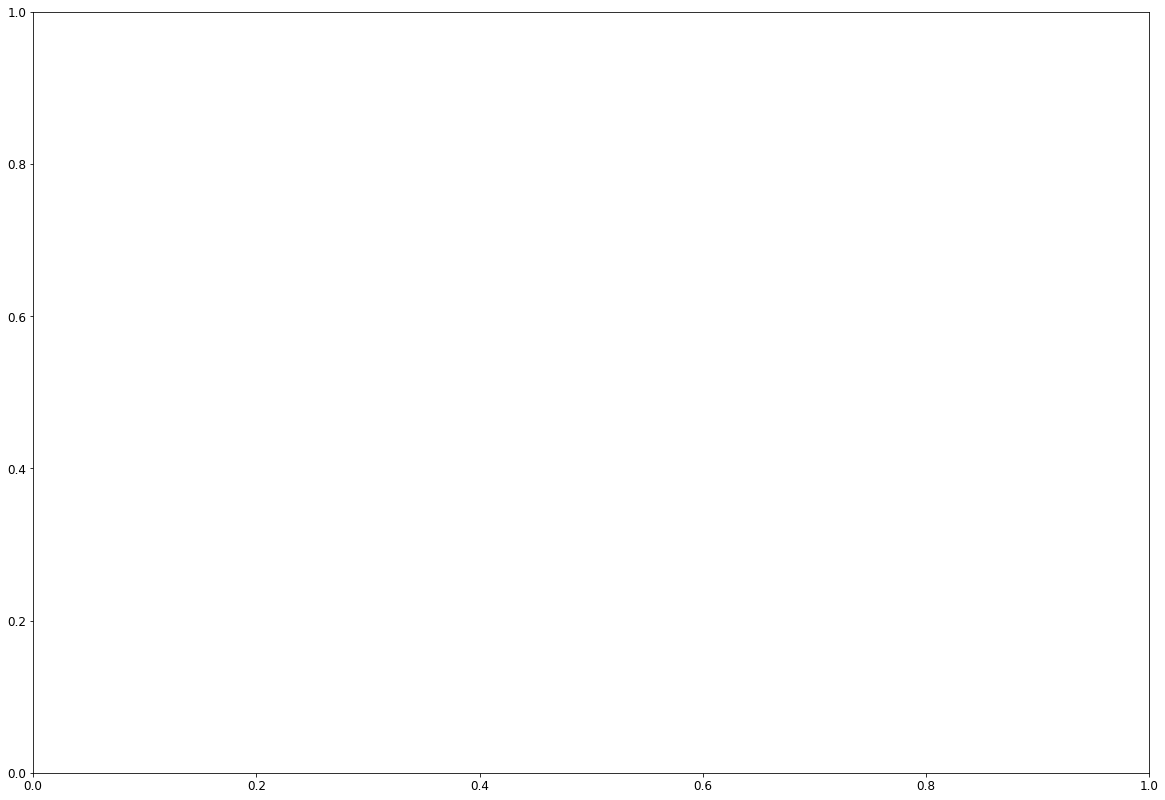

In [105]:
from matplotlib.colors import LogNorm

histogram.reset_index(inplace=True, drop=True)
plt.figure(figsize=(20, 14))
plt.imshow((histogram.iloc[:,0:1000]), aspect='auto', norm=LogNorm())
plt.colorbar(aspect=50)
None

(0.0, 30.0)

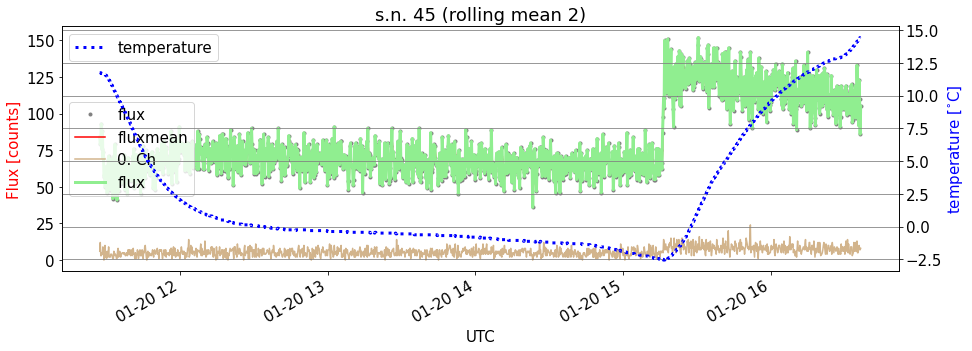

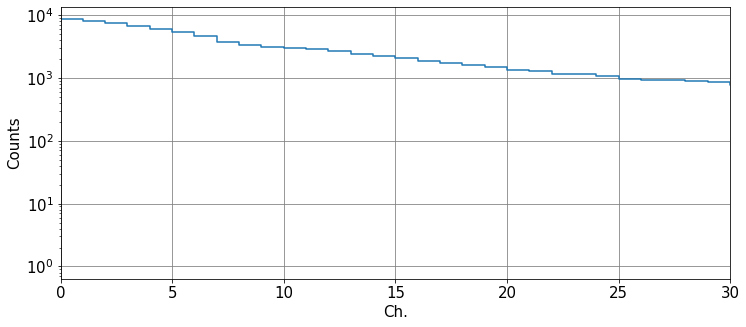

In [20]:
NOISE_LEVEL = 0
LAST_CHANNEL = 256
WINDOW = 2

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2021-05-12 8:35:00':'2021-05-12 16:00:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))
#yy = xx.loc['2021-05-12 11:05:00':'2021-05-12 11:30:00']
#yy = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
yy = xx

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)
yy['flux'].plot(c='lightgreen', linewidth='3')

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=6)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()

yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:258],range(0,258))})
ener = yy.iloc[:,0:240].sum()
ener = ener.reset_index()
plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([0,30])

In [21]:
l = np.array([[1, 1],[5,1]]) # Calibration
r = np.array([0.511, 1.275])
coef = np.linalg.solve(l,r)
print (coef[0], coef[1])
255  * coef[0] + coef[1]

0.19099999999999998 0.32


49.02499999999999

In [47]:
raise # nedodelano

hits.loc[hits[1]>500,1]=500
hits.loc[:,[*map('h{:04}'.format, range(1050))]] = 0
            
nchannels = 1024

try:
    for i in range(len(hits)):
        nevents = hits.iloc[i,1]
        events_chan = hits.iloc[i,3::2][:nevents]
        hits.iloc[i,1042:1042+nchannels] = np.bincount(events_chan, minlength=nchannels)
except:
    print(i)
    raise
    
histogram = pd.DataFrame()
histogram = hist.iloc[:,10+FIRSTCH:10+HISTHITS]
histogram = histogram.join(hits.iloc[:,1042+HISTHITS:])
histogram['temperature'] = hist[4]
histogram['pressure'] = hist[3]
histogram['voltage'] = hist[5]
histogram['current'] = hist[6]
histogram['UTC'] = hist['UTC']
histogram = histogram.rename(columns={x:y for x,y in zip(histogram.columns[:1024],range(0,1024))})
#histogram.to_csv(dto + '/histogram.csv')
histogram

RuntimeError: No active exception to reraise

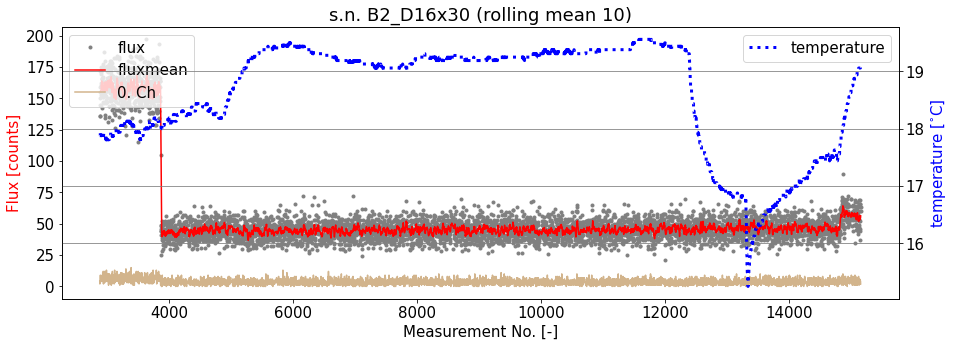

In [32]:
NOISE_LEVEL = 0
LAST_CHANNEL = 1023
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
#xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('Measurement No. [-]')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



/tmp/ipykernel_25698/992775256.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,2e4])
/tmp/ipykernel_25698/992775256.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,2e4])


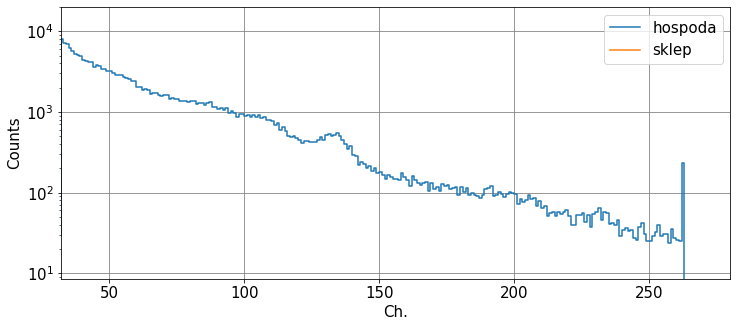

In [9]:
plt.figure(figsize=(12,5))

yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

#yy = yy.loc['2022-07-17 00:00:00':'2022-07-17 19:50:00']

ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.plot(ener[0], drawstyle='steps-post', label='hospoda')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([32,280])
plt.ylim([0,2e4])

yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

yy = yy.loc['2022-07-17 20:00:00':'2022-07-18 22:50:00']

ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.plot(ener[0], drawstyle='steps-post', label='sklep')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([32,280])
plt.ylim([0,2e4])

plt.legend()

/tmp/ipykernel_8871/4012391210.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_8871/4012391210.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


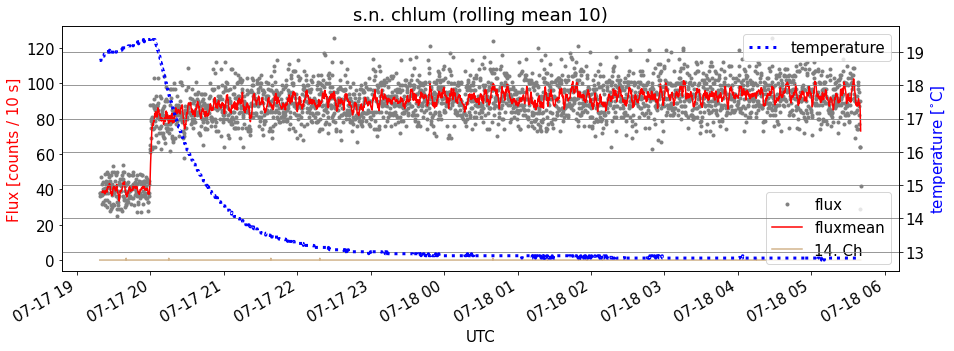

In [25]:
NOISE_LEVEL = 14
LAST_CHANNEL = 1023
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']
#xx = xx.loc['2022-4-25 00:00:00':'2022-4-25 8:00:00']
#xx = xx.loc['2022-1-16 00:00:00':'2022-1-21 00:00:00']
#xx = xx.loc['2021-11-17 00:00:00':'2021-11-18 00:00:00']
#xx = xx.loc['2022-07-17 00:00:00':'2022-07-17 19:50:00']
#xx = xx.loc['2022-07-17 20:00:00':'2022-07-17 23:50:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts / 10 s]', color='red')
plt.legend(loc=4)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-post')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



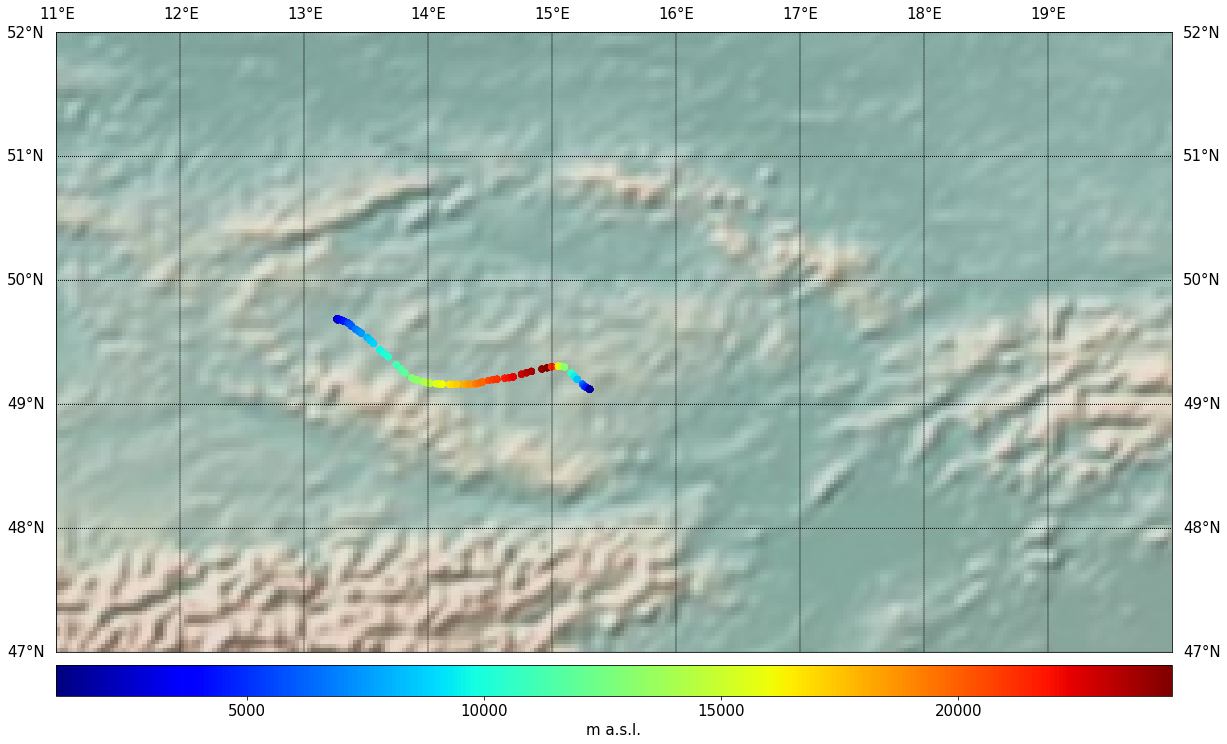

In [108]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import urllib, os

plt.figure(figsize=(20,20))
plt.tight_layout()

matplotlib.rcParams.update({'font.size': 15})

# create Basemap instance.
#m = Basemap(projection='kav7',lon_0=0)
m = Basemap(projection='cyl',lon_0=0, llcrnrlon=11,llcrnrlat=47,urcrnrlon=20,urcrnrlat=52)
#m = Basemap(projection='robin',lon_0=0)
#m = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=85,projection='mill')

histogram = histogram.loc[histogram.alt >700]

x, y = m(histogram.lon.tolist(),histogram.lat.tolist())
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(0.,99.,1.),labels=[1,1,0,0])
m.drawmeridians(np.arange(0.,20.,1.),labels=[0,0,1,0])
m.shadedrelief()

im1 = m.scatter(x,y,c=histogram.alt.tolist(),marker='o', cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('m a.s.l.')

#plt.clim(0, 12500)  # limit for color axis
plt.show()                


In [104]:
histogram

,12,13,14,15,16,17,18,19,20,21,...,1033,alt,lat,lon,meas,UTC,temperature,pressure,voltage,current
UTC,,,,,,,,,,,,,,,,,,,,,
2022-12-18 08:41:00.060,0,0,0,0,0,0,0,0,0,0,...,NaN,355.6,49.678273,13.288051,72,2022-12-18 08:41:00.060,-4.88,990.91,4.03,-93.0
2022-12-18 08:41:12.990,1,1,0,0,0,0,0,0,0,0,...,NaN,355.6,49.678273,13.288051,73,2022-12-18 08:41:12.990,-4.88,990.91,4.03,-89.0
2022-12-18 08:41:25.940,0,0,0,0,1,0,0,0,1,0,...,NaN,355.6,49.678273,13.288051,74,2022-12-18 08:41:25.940,-4.88,990.90,4.03,-87.0
2022-12-18 08:41:39.170,0,1,0,0,0,0,0,0,0,0,...,NaN,355.6,49.678273,13.288051,75,2022-12-18 08:41:39.170,-4.88,990.90,4.03,-86.0
2022-12-18 08:41:52.420,0,0,0,0,0,0,1,0,0,1,...,NaN,355.6,49.678273,13.288051,76,2022-12-18 08:41:52.420,-4.81,990.91,4.03,-86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-18 20:57:24.750,0,0,0,0,0,1,0,0,0,0,...,NaN,484.7,49.751501,14.979218,3045,2022-12-18 20:57:24.750,14.50,994.26,3.69,-98.0
2022-12-18 20:57:38.000,0,0,0,1,0,1,0,1,1,1,...,NaN,484.7,49.751501,14.979218,3046,2022-12-18 20:57:38.000,14.50,995.52,3.69,-99.0
2022-12-18 20:57:51.270,0,0,0,0,0,1,1,0,1,0,...,NaN,484.7,49.751501,14.979218,3047,2022-12-18 20:57:51.270,14.56,996.58,3.69,-99.0
